# Model
Exicting part, try different types regression model.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data, specify index so it's easier to join and search using loc
path = '../../../data/new-york-city-airbnb-open-data/'
listings_csv = os.path.join(path,'model_columns_listings.csv')
listings = pd.read_csv(listings_csv, index_col = 'id')

In [3]:
#shape
listings.shape

(28364, 47)

In [4]:
listings.columns

Index(['Unnamed: 0', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'guests_included', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'cleaning_fee_yes_no', 'security_deposit_yes_no', 'extra_people_yes_no',
       'last_review_days_ago', 'amenities_count',
       'host_response_time_one_hour', 'host_response_rate_calc',
       'host_acceptance_rate_calc', 'apt_yes_no', 'real_bed_yes_no',
       'multiple_listings', 'neighbourhood_group_cleansed_Bronx',
       'neighbourhood_group_cleansed_Brooklyn',
       'neighbourhood_group_cleansed_Manhattan',
       'neighbourhood_group_cleansed_Queens',
  

In [21]:
#head
listings.head(1)

Unnamed: 0  host_since  host_response_time host_response_rate  \
id                                                                    
2595           0      733294                 3.0                87%   

     host_acceptance_rate  host_is_superhost  host_listings_count  \
id                                                                  
2595                  38%                  0                  6.0   

      host_identity_verified  latitude  longitude  ...  \
id                                                 ...   
2595                       1  40.75362  -73.98377  ...   

      cancellation_policy_moderate  cancellation_policy_strict  \
id                                                               
2595                             0                           0   

      cancellation_policy_strict_14_with_grace_period  \
id                                                      
2595                                                1   

      cancellation_policy_super_strict_30  \
id                                          
2595                                    0   

      cancellation_policy_super_strict_60  bed_type_Airbed  bed_type_Couch  \
id                                                                           
2595                                    0                0               0   

      bed_type_Futon  bed_type_Pull-out Sofa  bed_type_Real Bed  
id                                                               
2595               0                       0                  1  

[1 rows x 80 columns]

# Features/Target


In [8]:
X = listings[['host_since', 'host_is_superhost', 'host_identity_verified', 'is_location_exact', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit_yes_no', 'cleaning_fee_yes_no', 'guests_included','extra_people_yes_no', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value',
'instant_bookable', 'reviews_per_month', 'neighbourhood_group_cleansed_Bronx', 'neighbourhood_group_cleansed_Brooklyn', 
'neighbourhood_group_cleansed_Manhattan', 'neighbourhood_group_cleansed_Queens', 'neighbourhood_group_cleansed_Staten Island', 'amenities_count','host_response_time_one_hour', 'host_response_rate_calc','host_acceptance_rate_calc', 'apt_yes_no', 'real_bed_yes_no','multiple_listings', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room','cancellation_policy_calc_flexible', 'cancellation_policy_calc_moderate', 'cancellation_policy_calc_strict', 'last_review_days_ago']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression

In [9]:
#using CV
regressor = Lasso(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)


[74.56092391 75.09930057 67.14476535 77.50680124 76.73007185 70.73261386
 72.63609027 71.587892   71.69829412 68.58194937]


In [10]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


72.62787025507173
0.5365637895631274


In [11]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

70.34683791319846
0.5567055414500827


# Ridge Regression

In [12]:
#using CV
regressor = Ridge(alpha=0.5)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)
print(rmse_scores)


[74.26910967 74.83652207 66.6554976  77.2076364  76.35864822 70.39403934
 72.30509991 71.24025289 71.67692914 68.37394975]


In [13]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))


72.33176849897579
0.5407988216906112


In [14]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

70.01717402015002
0.5608505964438222


# Random Forest

In [15]:
#using CV
regressor = RandomForestRegressor(n_estimators=100, random_state=None, min_samples_split=100)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[71.65779182 72.02955252 64.04354199 72.08655446 70.60480603 65.8200233
 67.21323493 65.36176028 67.52696505 64.68381943]


In [16]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

68.10280498047004
0.664974705503623


In [17]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

64.13388370109938
0.6315502884758637


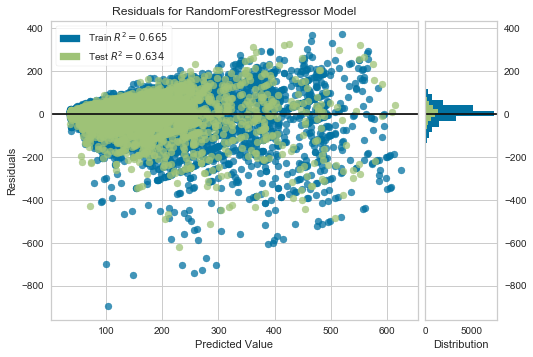

In [18]:
#chart
from yellowbrick.regressor import prediction_error, ResidualsPlot

model = RandomForestRegressor(n_estimators=100, random_state=None, min_samples_split=100)
oz = ResidualsPlot(model)

oz.fit(X_train, y_train)
oz.score(X_test, y_test)
_ = oz.show()

# Gradient Boost

In [19]:
#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores) 
print(rmse_scores)

[70.42780354 69.84357666 62.67904357 70.45878153 70.45397485 65.54933159
 65.88919793 64.47826144 67.02668011 62.77018751]


In [20]:
pred_train= regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

66.9576838734493
0.6344510771126775


In [21]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

63.918376660397996
0.6340223077539501


# Feature Importance
this was for gradient boosting - run the same code for random forest, make sure run the fit/model first, it uses same regessor variable

In [22]:
#get features importance
features = regressor.feature_importances_

#get column names from our list of features
column_names=X.columns.values.tolist()

#match features importance to column name
df = pd.DataFrame([features], columns=column_names)


In [23]:
df.head()

host_since  host_is_superhost  host_identity_verified  is_location_exact  \
0    0.007346           0.000397                     0.0           0.000069   

   accommodates  bathrooms  bedrooms      beds  security_deposit_yes_no  \
0      0.182681    0.14787  0.166619  0.003058                 0.001281   

   cleaning_fee_yes_no  ...  real_bed_yes_no  multiple_listings  \
0                  0.0  ...              0.0           0.000172   

   room_type_Entire home/apt  room_type_Hotel room  room_type_Private room  \
0                   0.279589                   0.0                0.000869   

   room_type_Shared room  cancellation_policy_calc_flexible  \
0               0.001379                           0.000246   

   cancellation_policy_calc_moderate  cancellation_policy_calc_strict  \
0                                0.0                         0.003509   

   last_review_days_ago  
0              0.002475  

[1 rows x 42 columns]

In [24]:
#features importance sorted
features_sorted = df.iloc[0].sort_values(ascending=False)

In [25]:
features_sorted.head(60)


room_type_Entire home/apt                     0.279589
accommodates                                  0.182681
bedrooms                                      0.166619
bathrooms                                     0.147870
neighbourhood_group_cleansed_Manhattan        0.136705
guests_included                               0.014327
review_scores_rating                          0.012518
host_since                                    0.007346
extra_people_yes_no                           0.006807
reviews_per_month                             0.006549
apt_yes_no                                    0.004947
amenities_count                               0.004147
review_scores_cleanliness                     0.003934
cancellation_policy_calc_strict               0.003509
review_scores_value                           0.003189
beds                                          0.003058
last_review_days_ago                          0.002475
number_of_reviews_ltm                         0.002323
neighbourh

# Using Yellowbrick to visuzlize

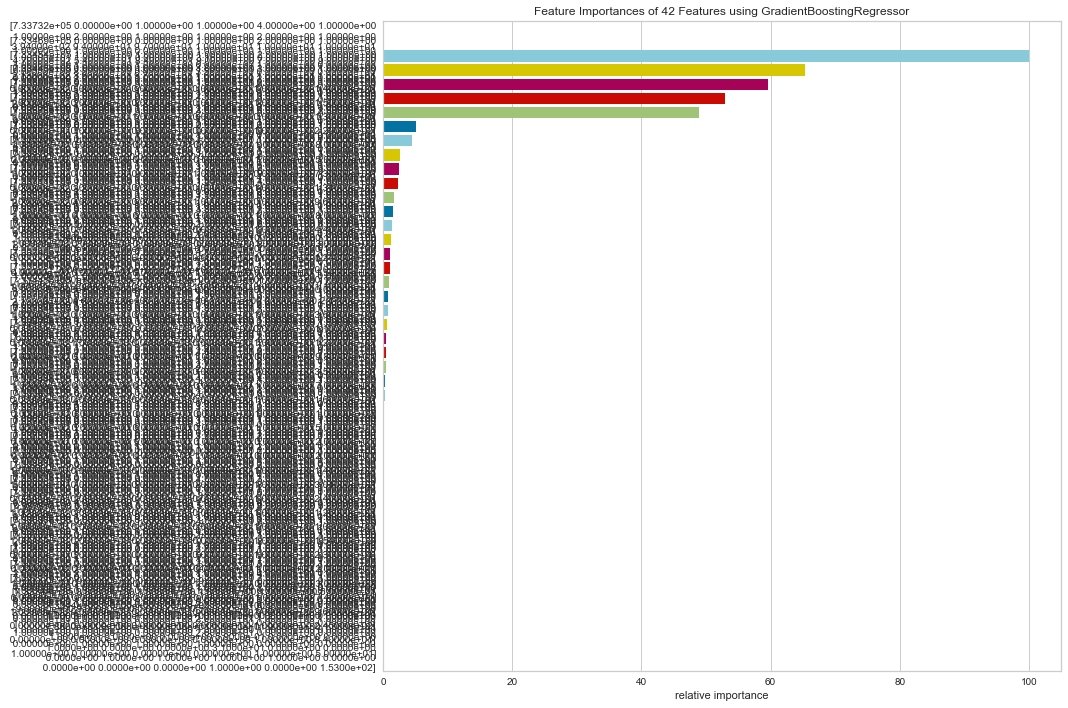

In [26]:
from yellowbrick.features import FeatureImportances

model = regressor = GradientBoostingRegressor(random_state=0)
viz = FeatureImportances(model, labels=X, size=(1080, 720))

viz.fit(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

# Model Output for Testing Flask
Using very few features

In [27]:
X = listings[['bedrooms',
            'accommodates',
            'room_type_Entire home/apt',
            'bathrooms',
            'neighbourhood_group_cleansed_Manhattan',
            'guests_included']]

y = listings['price']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boost
For testing flask

In [28]:
#using CV
# regressor = Lasso(alpha=0.1)
# regressor = regressor.fit(X_train, y_train) 

#using CV
regressor = GradientBoostingRegressor(random_state=0)
regressor = regressor.fit(X_train, y_train) 

#cross validation, 10 fold to try next
scores = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

print(rmse_scores)

[71.93204392 72.99328067 65.72337308 73.99507118 72.46985177 67.36328599
 69.05958469 66.73058754 68.54277203 65.00804078]


In [29]:
pred_train = regressor.predict(X_train)
print(rmse_scores.mean())
print(r2_score(y_train, pred_train))

69.3817891653194
0.593854664549607


In [30]:
pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test))) 
print(r2_score(y_test, pred_test))

66.30663031631445
0.6061625085738807


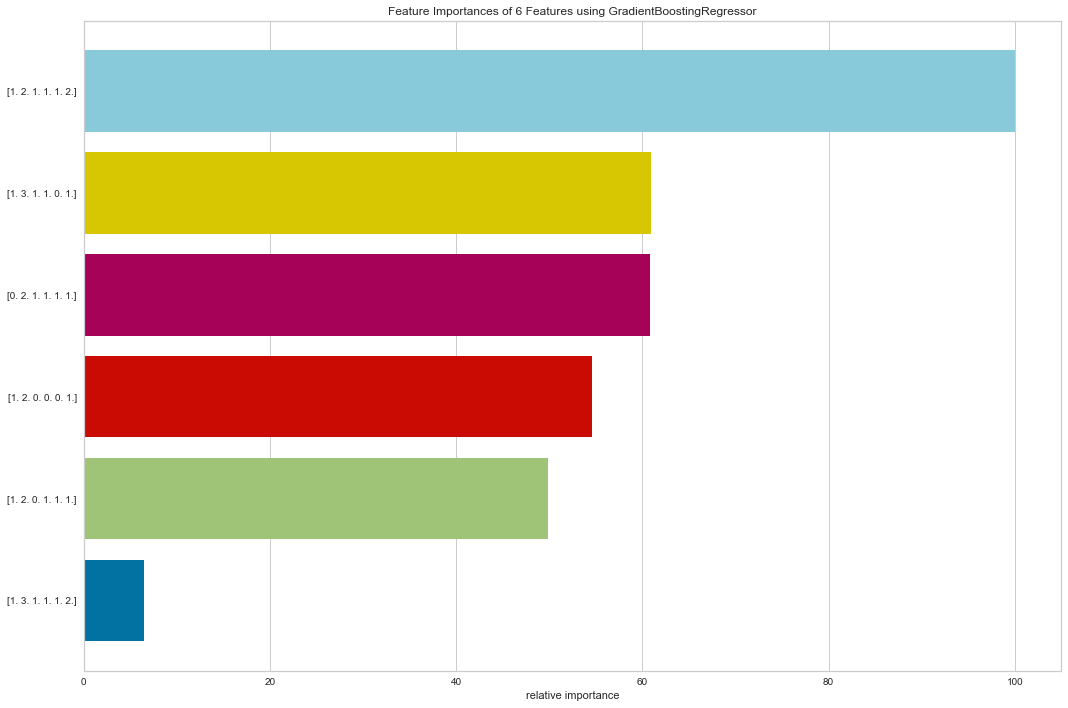

In [31]:
model = regressor = GradientBoostingRegressor(random_state=0)
viz = FeatureImportances(model, labels=X, size=(1080, 720))

viz.fit(X_train, y_train)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

In [33]:
# Saving model to disk
pickle.dump(regressor, open('model.pkl','wb'))

# Webapp

In [11]:
%%HTML

'<iframe width="700" height="600" src="http://seebeyond.pythonanywhere.com" frameborder="0" allowfullscreen></iframe>'
